<a href="https://colab.research.google.com/github/amiable-dev/process-assess/blob/main/assess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Capture Logical Process

Enable temporary capture of logical processes by setting up pandas dataframes and appropriate method to add data.

In [ ]:
import pandas as pd

# Initialize an empty DataFrame
df_processes = pd.DataFrame(columns=['ProcessID', 'Name', 'Duration', 'Dependencies'])

def add_process(process_id, name, duration, dependencies):
    global df_processes
    new_row = pd.DataFrame({
        'ProcessID': [process_id],
        'Name': [name],
        'Duration': [duration],
        'Dependencies': [dependencies]
    })
    df_processes = pd.concat([df_processes, new_row], ignore_index=True)


Then add data

In [ ]:
print(df_processes)

# Adding processes
add_process(1, 'Process A', 5, [])          # No dependencies
add_process(2, 'Process B', 3, [1])         # Depends on Process A
add_process(3, 'Process C', 2, [1])         # Depends on Process A
add_process(4, 'Process D', 4, [2, 3])      # Depends on Process B and Process C

print(df_processes)

Empty DataFrame
Columns: [ProcessID, Name, Duration, Dependencies]
Index: []
  ProcessID       Name Duration Dependencies
0         1  Process A        5           []
1         2  Process B        3          [1]
2         3  Process C        2          [1]
3         4  Process D        4       [2, 3]


Next display resulting digraph

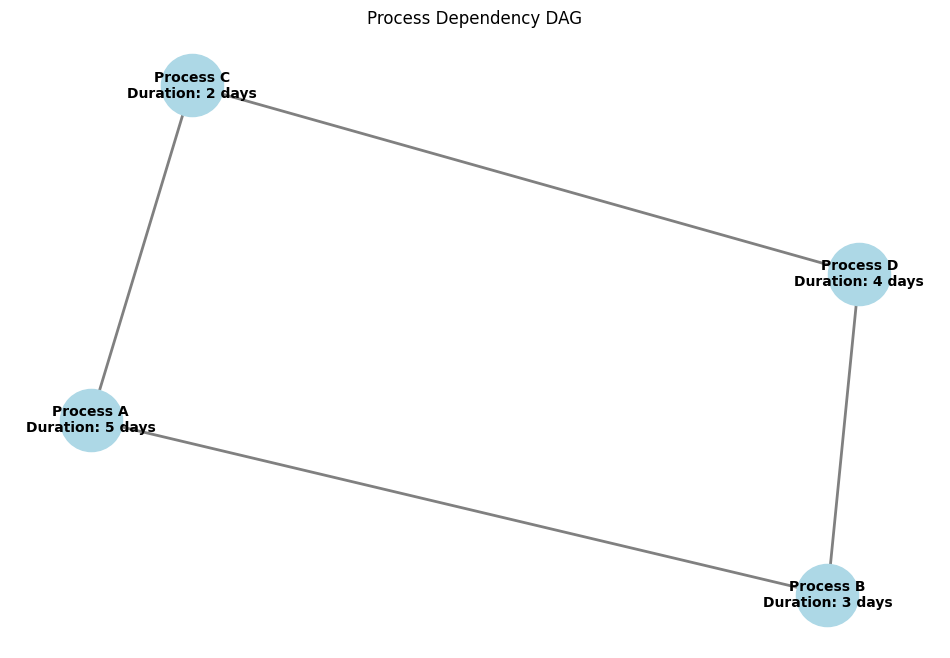

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming df_processes is already defined and populated
df_processes = pd.DataFrame({
    'ProcessID': [1, 2, 3, 4],
    'Name': ['Process A', 'Process B', 'Process C', 'Process D'],
    'Duration': [5, 3, 2, 4],
    'Dependencies': [[], [1], [1], [2, 3]]
})

# Create a directed graph
G = nx.DiGraph()

# Add nodes with attributes
for idx, row in df_processes.iterrows():
    G.add_node(row['ProcessID'], label=row['Name'], duration=row['Duration'])

# Add edges based on dependencies
for idx, row in df_processes.iterrows():
    for dep in row['Dependencies']:
        G.add_edge(dep, row['ProcessID'])  # Edge from dependency to current process

# Get positions for the nodes in the graph
pos = nx.spring_layout(G)

# Get labels and durations
labels = nx.get_node_attributes(G, 'label')
durations = nx.get_node_attributes(G, 'duration')

# Combine labels and durations for display
node_labels = {node: f"{labels[node]}\nDuration: {durations[node]} days" for node in G.nodes()}

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray', width=2)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Remove axis
plt.axis('off')
plt.title('Process Dependency Digraph')
plt.show()